In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

## Reading Files into Python

In [2]:
#importing data

data = pd.read_csv('Data/churn_data_preprocessed.csv')

data.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,...,0.20,0.20,0.20,1458.71,1458.71,0,141.0,21.0,5.0,1.0
1,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,8704.66,...,0.56,5486.27,100.56,6496.78,8787.61,0,11.0,2.0,1.0,4.0
2,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,5815.29,...,0.61,6046.73,259.23,5006.28,5070.14,0,NaN,NaN,NaN,NaN
3,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,2291.91,...,0.47,0.47,2143.33,2291.91,1669.79,1,159.0,23.0,6.0,5.0
4,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,1401.72,...,714.61,588.62,1538.06,1157.15,1677.16,1,70.0,11.0,3.0,0.0


## Bivariate Analysis : Numerical-Numerical

In [3]:
# seggregating variables into groups for segmented analysis

customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [4]:
# isolating numerical datatypes

numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

vintage                             int64
age                                 int64
dependents                        float64
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

### Correlation Matrix

In [5]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
vintage,1.000000,0.003212,0.005126,0.006336,0.000631,0.002343,-0.007444,-0.008176,-0.010997,-0.003825,...,-0.000758,-0.005140,-0.008253,-0.008962,-0.010513,-0.007019,0.003524,-0.005458,0.003298,-0.013068
age,0.003212,1.000000,-0.004132,0.014448,-0.077845,-0.066683,0.057855,0.061578,0.069833,0.081047,...,0.027527,0.025093,0.027076,0.061973,0.066546,-0.028517,0.003314,-0.004310,0.004020,-0.021560
dependents,0.005126,-0.004132,1.000000,0.000641,0.011654,0.018951,-0.004402,-0.000815,0.000146,0.002800,...,0.022981,0.006820,0.029014,-0.001773,0.000323,0.028278,0.053649,0.023503,0.052866,-0.009535
city,0.006336,0.014448,0.000641,1.000000,0.004268,-0.063632,-0.002351,-0.000925,-0.002783,-0.003385,...,0.006452,0.002007,0.006734,-0.003247,-0.001891,-0.002960,0.003073,0.008090,0.003683,0.004965
customer_nw_category,0.000631,-0.077845,0.011654,0.004268,1.000000,0.231860,-0.110383,-0.106599,-0.108728,-0.130320,...,-0.077767,-0.035164,-0.078973,-0.109466,-0.103920,0.008982,-0.033508,-0.002542,-0.032456,0.012632
branch_code,0.002343,-0.066683,0.018951,-0.063632,0.231860,1.000000,-0.024663,-0.022427,-0.020721,-0.021795,...,-0.025636,-0.016697,-0.018799,-0.022787,-0.019547,0.033300,-0.012979,0.010564,-0.012522,0.015951
current_balance,-0.007444,0.057855,-0.004402,-0.002351,-0.110383,-0.024663,1.000000,0.808083,0.856261,0.581010,...,0.101875,0.075600,0.153244,0.939750,0.811225,-0.039481,0.031392,-0.005861,0.030444,-0.003349
previous_month_end_balance,-0.008176,0.061578,-0.000815,-0.000925,-0.106599,-0.022427,0.808083,1.000000,0.907379,0.659308,...,0.195421,0.100436,0.193573,0.909747,0.911579,0.017305,0.016170,-0.002080,0.015846,-0.000420
average_monthly_balance_prevQ,-0.010997,0.069833,0.000146,-0.002783,-0.108728,-0.020721,0.856261,0.907379,1.000000,0.730351,...,0.139360,0.091607,0.188285,0.920387,0.983764,0.028235,0.013815,-0.003330,0.013845,-0.001471
average_monthly_balance_prevQ2,-0.003825,0.081047,0.002800,-0.003385,-0.130320,-0.021795,0.581010,0.659308,0.730351,1.000000,...,0.128759,0.099086,0.164319,0.639991,0.700297,0.036077,0.013363,-0.007586,0.012982,-0.006520


### Heatmap

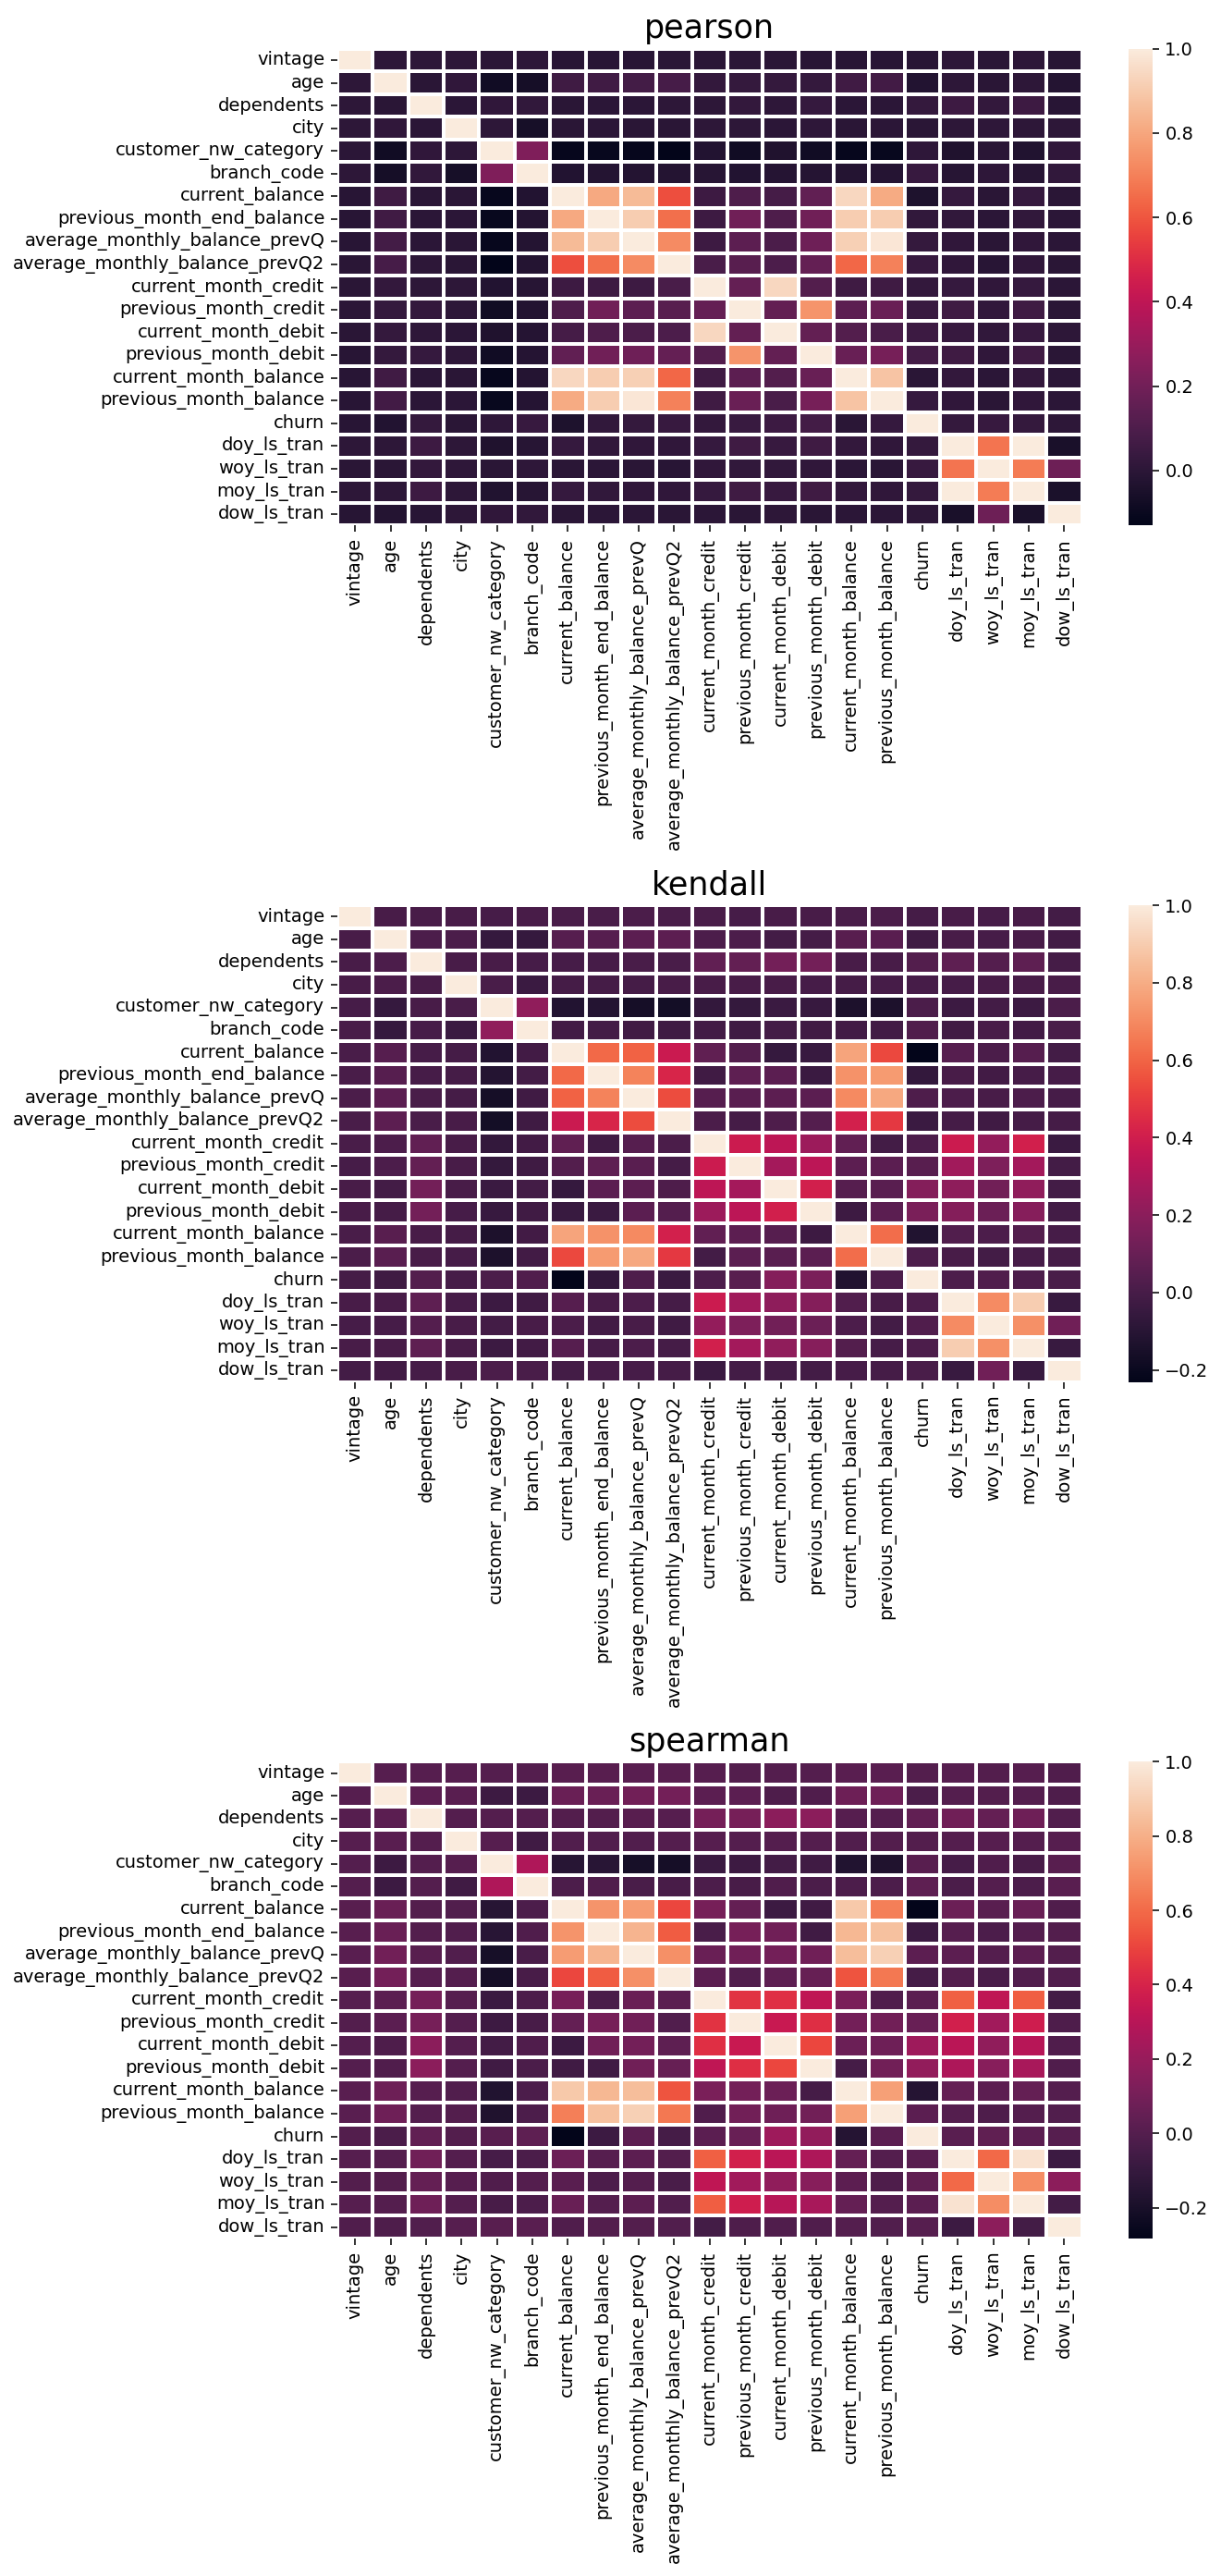

In [6]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(10,20), dpi=140, tight_layout = True)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(3,1,j+1)
    correlation = numerical.dropna().corr(method=i)
    sns.heatmap(correlation, linewidth = 2)
    plt.title(i, fontsize=18)

* Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
*  Too many variables with insignificant correlation.
*  Major correlation lies between the transaction variables and balance variables.

In [7]:
# extracting transaction information of current and previous months
var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)

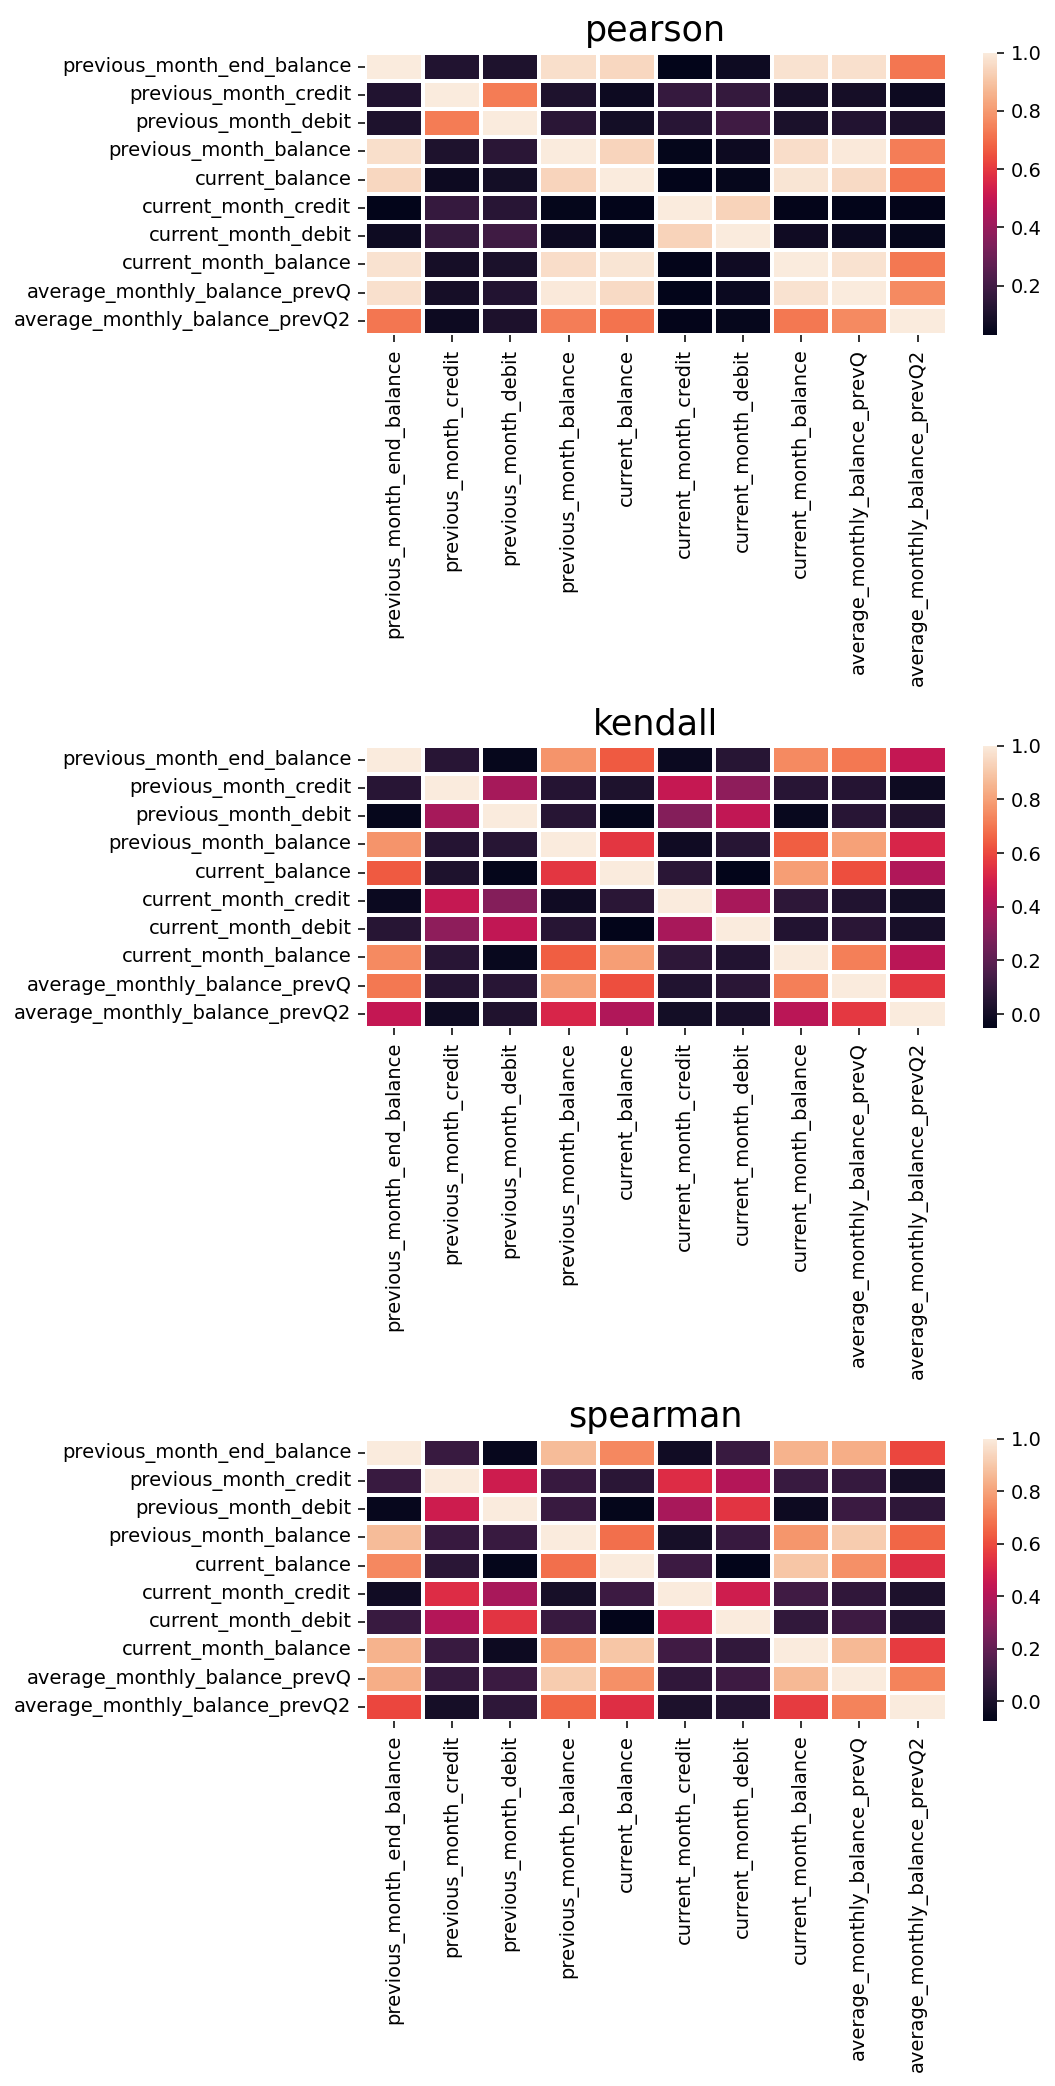

In [8]:
# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(8,15), dpi=140, tight_layout = True)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(3,1,j+1)
    correlation = numerical[var].dropna().corr(method=i)
    sns.heatmap(correlation, linewidth = 2)
    plt.title(i, fontsize=18)

**Inferences:**


1.   Transaction variables like credit/debit have a strong correlation among themselves.
2.  Balance variables have strong correlation among themselves.
3.   Transaction variables like credit/debit have insignificant or no correlation with the Balance variables.



### Scatterplot

In [9]:
# Grouping variables

transactions = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

**As we noticed earlier, due to the presence of outliers, the scatter plot is not meaningful**

In [10]:
#taking log of every value to negate outliers

for column in var:
    mini=1
    if numerical[column].min()<0:
        mini =  abs(numerical[column].min()) + 1

    numerical[column] = [i+mini for i in numerical[column]]
    numerical[column] = numerical[column].map(lambda x : np.log(x))

<Figure size 896x672 with 0 Axes>

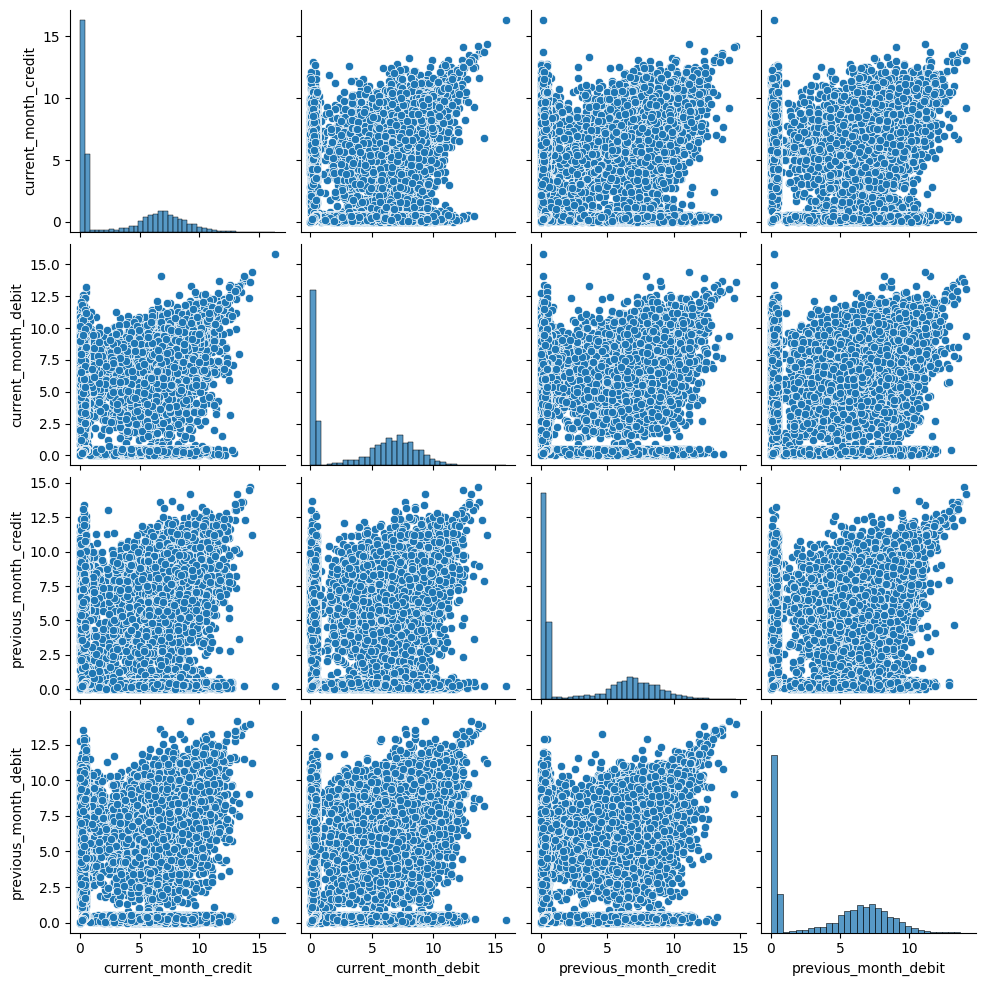

In [11]:
# scatter plot for transactional variables

plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

**Inferences**
1.    This validates the high correlation between the transaction variables.
2.    This high correlation can be used for feature engineering during the later stages.

<Figure size 896x672 with 0 Axes>

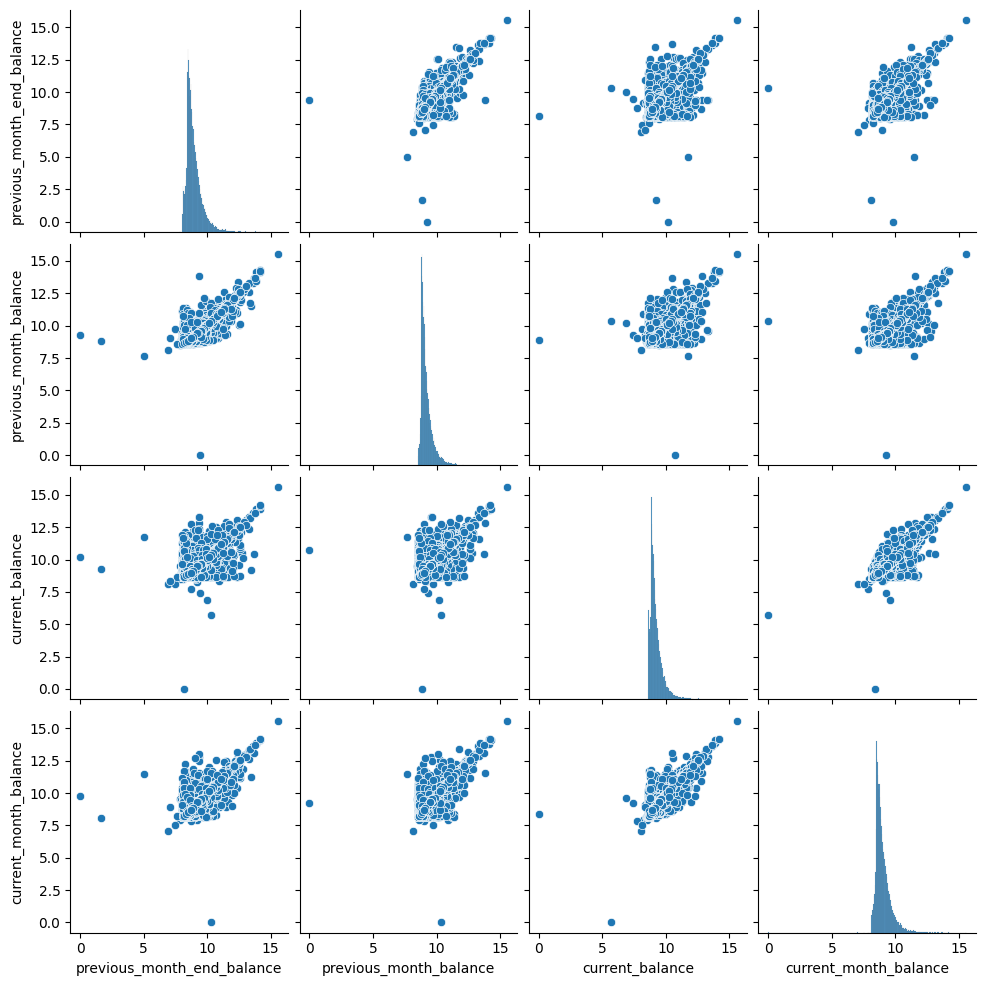

In [12]:
# balance variables
plt.figure(dpi=140)
sns.pairplot(numerical[balance])

**Inferences**
1.    This validates the high correlation between the balance variables.
2.    This high correlation can be used for feature engineering during the later stages.

<AxesSubplot:xlabel='average_monthly_balance_prevQ', ylabel='average_monthly_balance_prevQ2'>

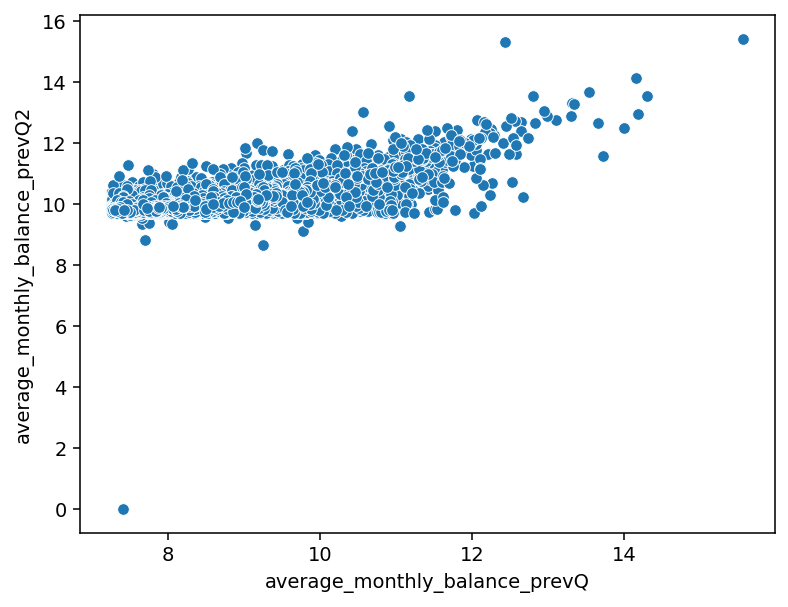

In [13]:
# previous quarters
plt.figure(dpi=140)
sns.scatterplot(numerical['average_monthly_balance_prevQ'], numerical['average_monthly_balance_prevQ2'])

**Inferences**
1.    This validates the high correlation between the two previous quarters
2.    This high correlation can be used for feature engineering during the later stages.

## Bivariate Analysis: Continuous-Categorical variables

List of **Hypothesis and investigation** to perform under this combination.

1.  Are vintage customers less likely to churn?
2.  Are customers with higher average balance less likely to churn?
3.  Are customers dropping monthly balance highly likely to churn?

> We will perform proportions test to see if there is any difference in churn rate between sample-sample or sample-population


In [14]:
# importing statistical modules

import scipy.stats as stats
from numpy import sqrt, abs, round
from scipy.stats import norm
from scipy.stats import t as t_dist
from statsmodels.stats.proportion import proportions_ztest 

In [15]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    '''
    takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
    '''
    ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
    z = (X1 - X2)/ovr_sigma
    pval = 2*(1 - norm.cdf(abs(z)))
    return pval

In [16]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
    '''
    takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
    '''
    ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
    t = (X1 - X2)/ovr_sd
    df = n1+n2-2
    pval = 2*(1 - t_dist.cdf(abs(t),df))
    return pval

In [17]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
    '''
    Univariate_Analysis_numeric
    takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
    '''

    size = len(var_group)
    plt.figure(figsize = (15, size*5), dpi = 200, tight_layout = True)

    #looping for each variable
    for j,i in enumerate(var_group):

        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # calculating points of standard deviation
        points = mean-st_dev, mean+st_dev

        #Plotting the variable with every information
        plt.subplot(size,1,j+1)
        sns.kdeplot(data[i], shade=True)
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev", linewidth = 5)
        plt.axvline([mini], color = 'green', label = "min", ymin = 0, ymax = 0.10, linewidth = 2)
        plt.axvline([maxi], color = 'green', label = "max", ymin = 0, ymax = 0.10, linewidth = 2)
        plt.axvline([mean], color = 'red', label = "mean")
        plt.axvline([median], color = 'blue', label = "median")
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('density', fontsize = 20)
        plt.legend()
        plt.title('std_dev = {};    kurtosis = {};    skew = {};\nrange = {};    mean = {};    median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                       round(kurt,2),
                                                                                                       round(skew,2),
                                                                                                       (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                       round(mean,2),
                                                                                                       round(median,2)))

In [18]:
def Bivariate_cont_cat(data, cont, cat, category):
    #creating 2 samples
    x1 = data[cont][data[cat]==category][:]
    x2 = data[cont][~(data[cat]==category)][:]

    #calculating descriptives
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.mean(), x2.mean()
    std1, std2 = x1.std(), x2.mean()

    #calculating p-values
    t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
    z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

    #table
    table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

    #plotting
    plt.figure(figsize = (15,6), dpi=140)

    #barplot
    plt.subplot(1,2,1)
    sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
    plt.ylabel('mean {}'.format(cont))
    plt.xlabel(cat)
    plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))
#     plt.title('{}'.format(table))

    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=cat, y=cont, data=data)
    plt.title('categorical boxplot')


### 1. Are vintage customers less likely to churn?



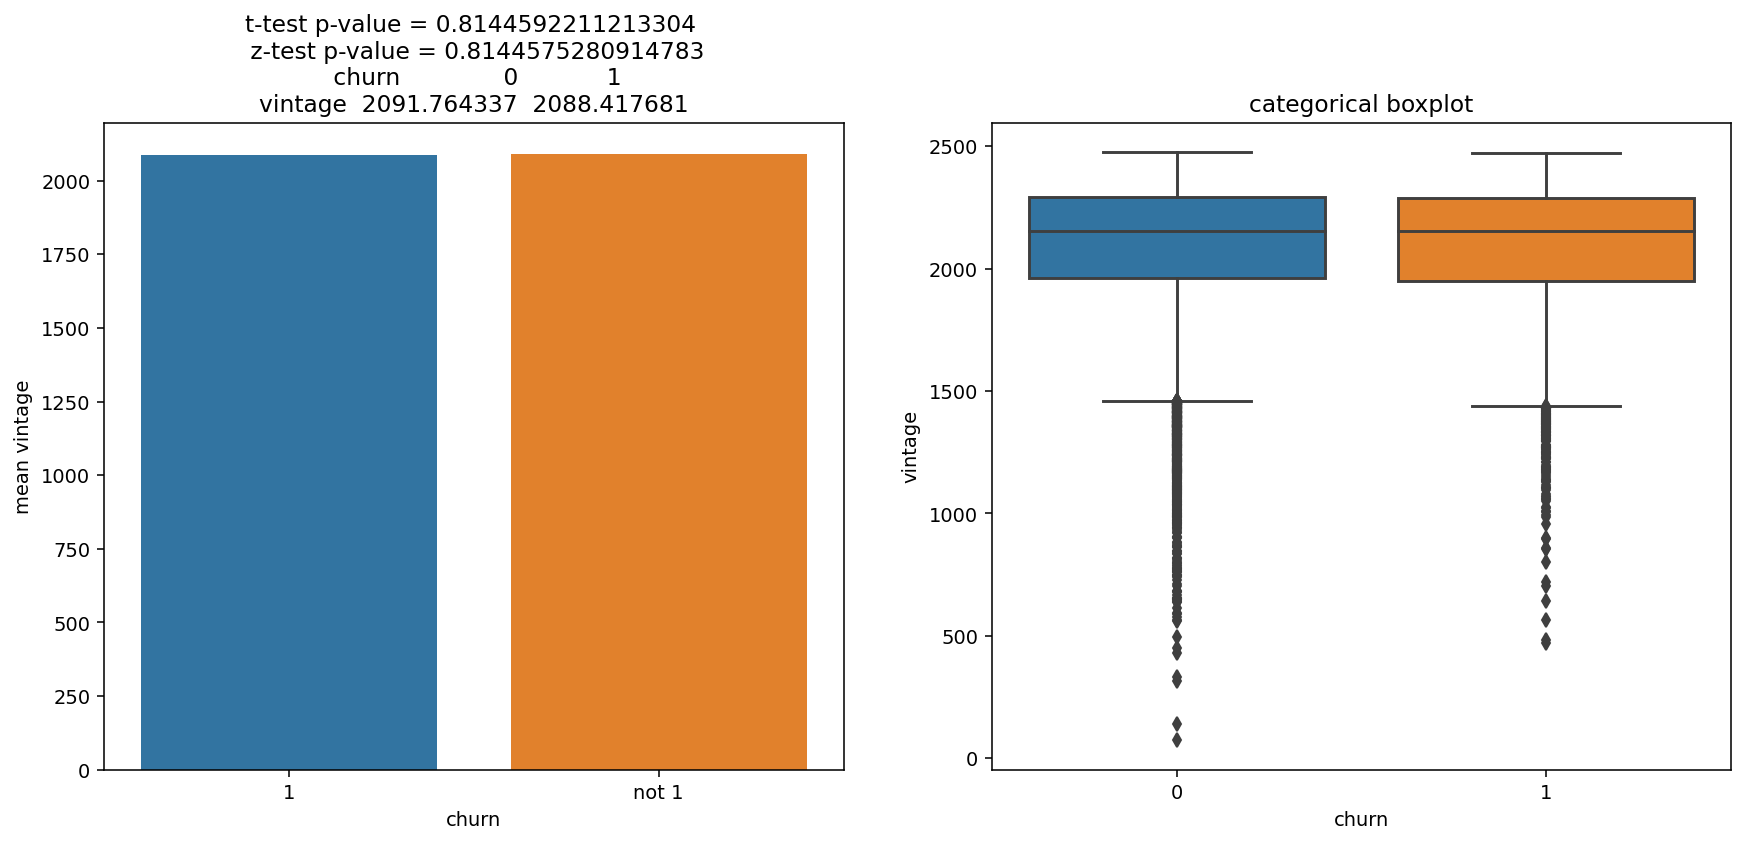

In [19]:
Bivariate_cont_cat(data, 'vintage', 'churn', 1)

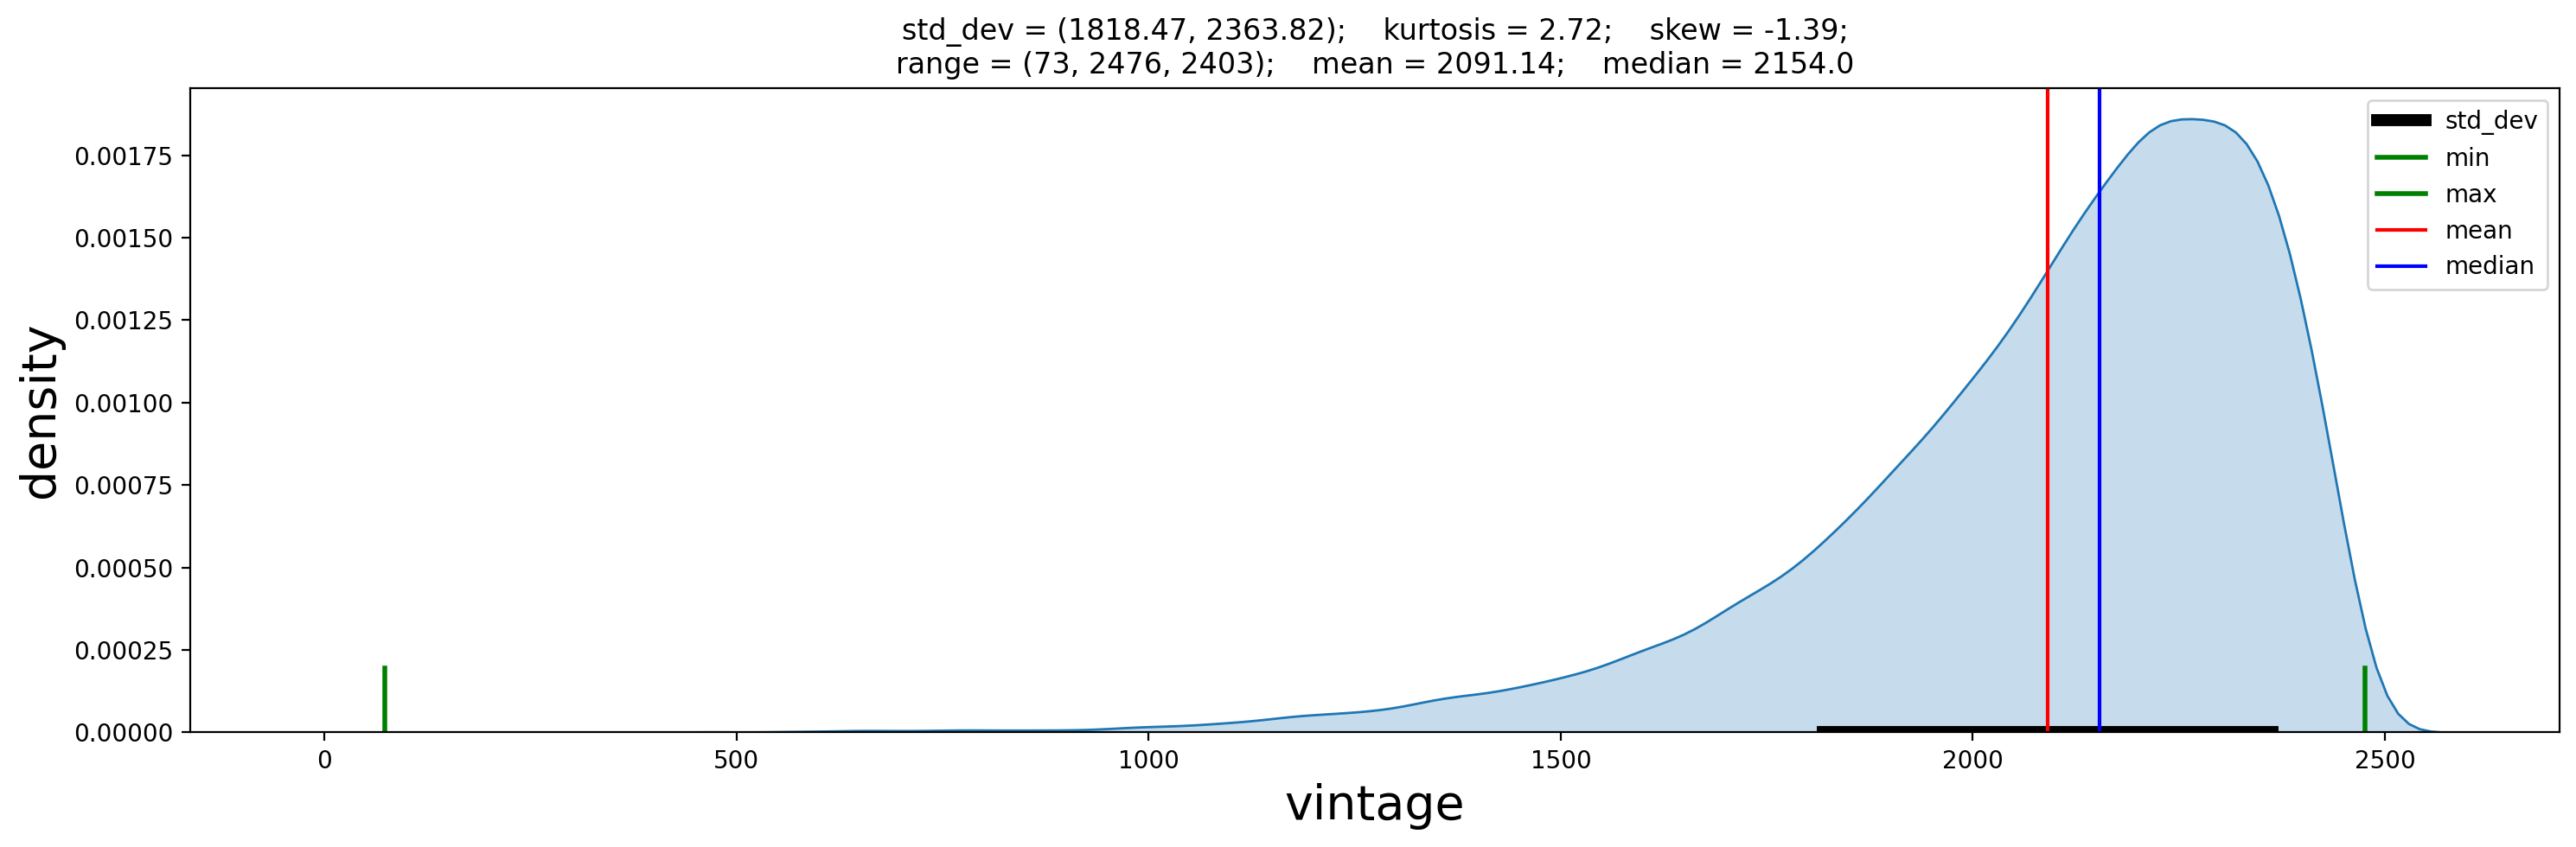

In [20]:
UVA_numeric(data, ['vintage'])

#### We see that the distribution of customers' vintage is skewed and contained more customers who were associated with the bank for longer. We will see if they are less likely to churn (more loyal since they have been using the bank's services for long time). 

**Hypothesis**

* **Null:** churn rate of higher vintage customers **>=** all customers


* **Alternate:** churn rate of higher vintage customers **<** all customers (strictly less)


> We will consider set of customers above median (2154) as there are 50% of total and compare them with the general population of customers.

> significance level = 0.1

In [21]:
# population proportion (churn rate of all customers)
p0 = round(data.churn.value_counts()[1]/data.churn.value_counts()[0],3)

# consider a sample of 200 values as test sample 
sample_data = data.loc[(data.vintage > 2154)].sample(n = 200, random_state = 0)

# count (number churned among test sample)
c = sample_data.loc[(sample_data.churn == 1)].shape[0]

# nobs (total number of higher vintage customers)
n = sample_data.shape[0]

print(p0, c, n)

0.227 37 200


In [22]:
print('p_value: ',proportions_ztest(c, n, p0, alternative='smaller')[1])

p_value:  0.0630484007903491


**Inferences**

1.    Vintage customers churned slightly more, but results are not significantly different.
2.    Boxplot shows very similar distribution with outliers on the lower end.

**Result**

- We can see that the average vintage between those who churned and didn't are not different (we accept null hypothesis for means). This signals that the distribution of customers who churn are random and don't have specific pattern across the population. Vintage overall doesn't seem to be a strong predictor for churn.



- But according to proportions, we see that there is slight evidence (at 0.1 alpha) that the churn rate of high vintage customers is strictly less compared to the population of customers. This could mean that those who have uses the services for long tend to be loyal. But a larger amount of people in the segment could also induce bias.

### 2. Are customers with lower average balance more likely to churn?

#### Average balance in previous quarters

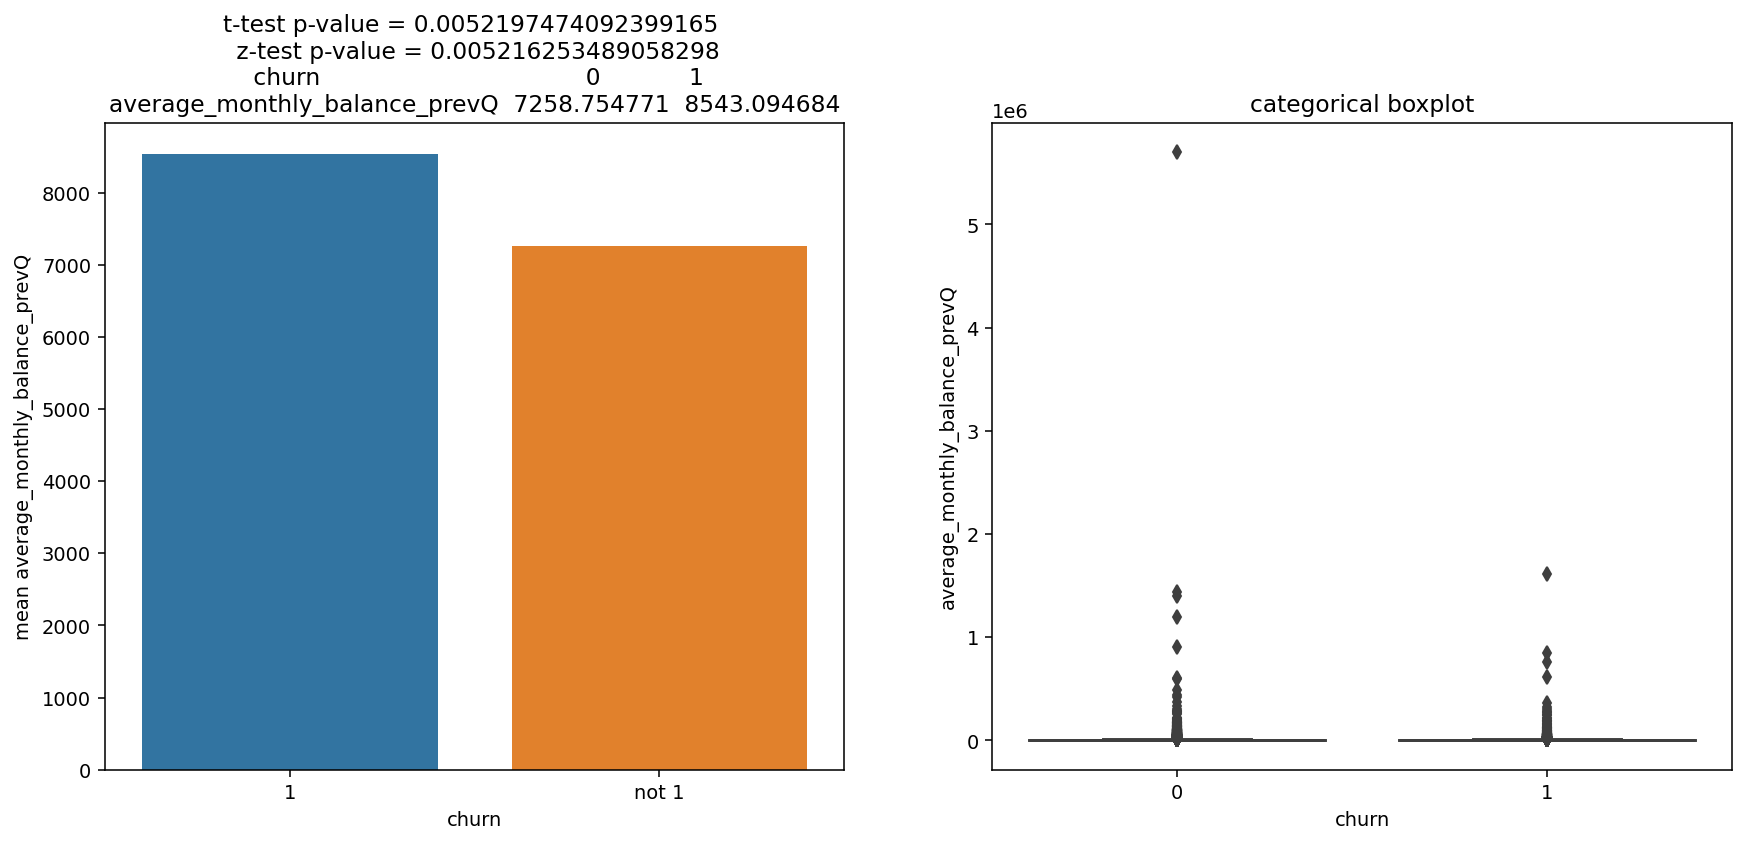

In [23]:
Bivariate_cont_cat(data, 'average_monthly_balance_prevQ', 'churn', 1)

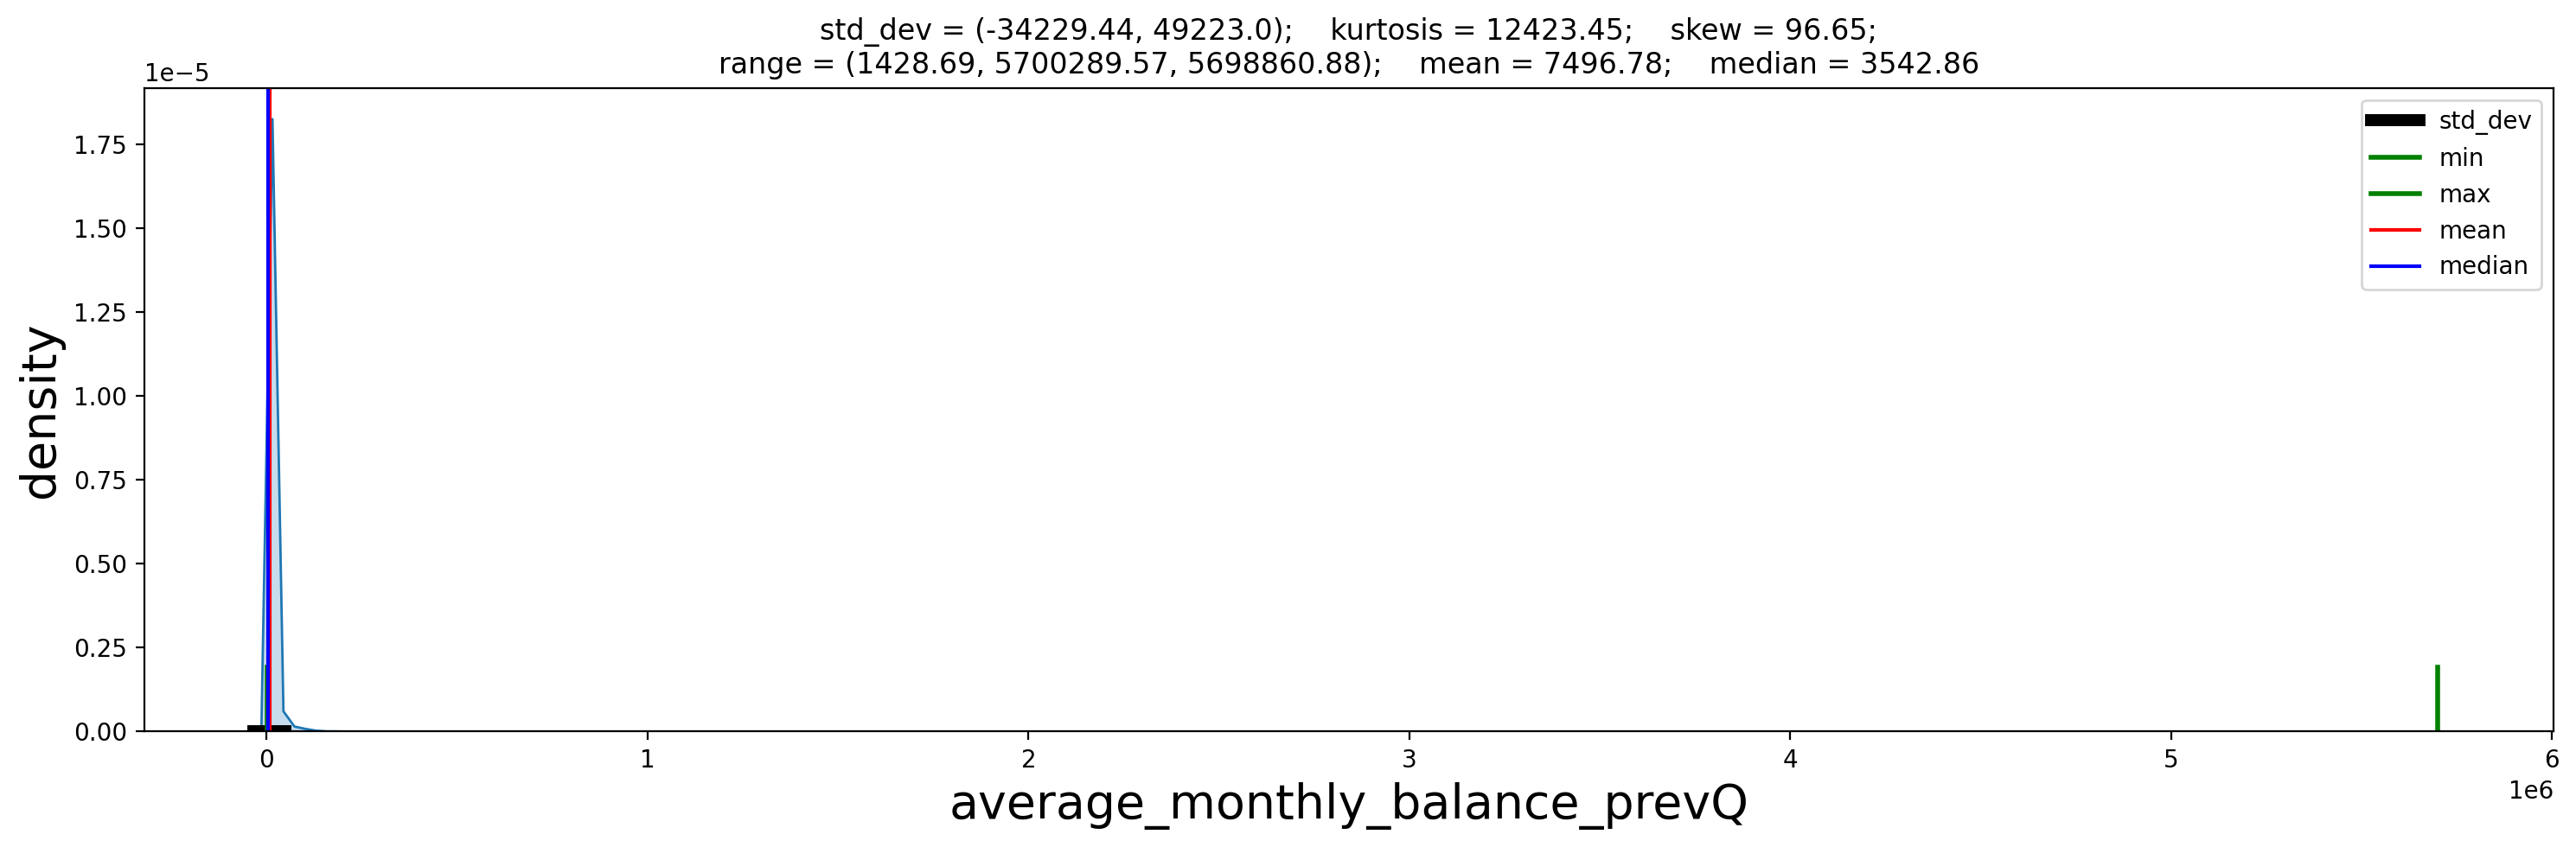

In [24]:
UVA_numeric(data, ['average_monthly_balance_prevQ'])

**Hypothesis**

* **Null:** churn rate of customers with low avg balance **<=** all customers


* **Alternate:** churn rate of customers with low avg balance **>** all customers (strictly greater)


> We will consider set of customers who have balance below median (3542) as there are 50% of total and compare them with the general population of customers.

> significance level = 0.05

In [25]:
# population proportion (churn rate of all customers)
p0 = round(data.churn.value_counts()[1]/data.churn.value_counts()[0],3)

# consider a sample of 200 values as test sample 
sample_data = data.loc[(data.average_monthly_balance_prevQ < 3542)].sample(n = 200, random_state = 0)

# count (number churned among higher vintage customers)
c = sample_data.loc[(sample_data.churn == 1)].shape[0]

# nobs (total number of higher vintage customers)
n = sample_data.shape[0]

print(p0, c, n)

0.227 42 200


In [26]:
print('p_value: ',proportions_ztest(c, n, p0, alternative='larger')[1])

p_value:  0.7224906271926752


#### How about those extreme outlier customers? Are they churning more than population?

> We will consider those customers whose avg balance previous quarter was 1 std above mean (49223).

In [27]:
# population proportion (churn rate of all customers)
p0 = round(data.churn.value_counts()[1]/data.churn.value_counts()[0],3)

# consider a sample of 200 values as test sample 
sample_data = data.loc[(data.average_monthly_balance_prevQ > 49223)].sample(n = 200, random_state = 0)

# count (number churned among test sample)
c = sample_data.loc[(sample_data.churn == 1)].shape[0]

# nobs (total number of higher vintage customers)
n = sample_data.shape[0]

print(p0, c, n)

0.227 50 200


In [28]:
print('p_value: ',proportions_ztest(c, n, p0, alternative='larger')[1])

p_value:  0.22627311388618332


**Inferences**
*    Customers who churned have higher balance during immediate preceeding quarter. We also see that the extreme outlier falls under not churned and the distribution of churn and not churn are similar. 


- Among customers whose monthly average balance for previous quarter was low, there is no significant evidence that they churn higher than the rest of population (we accept null at 0.05 significance). So is the case for those who have extremely high balance. Meaning they might churn lower or the same as the rest. Overall this field also doesn't seem to have a strong correlation as can be seen in the correlation matrix as well.

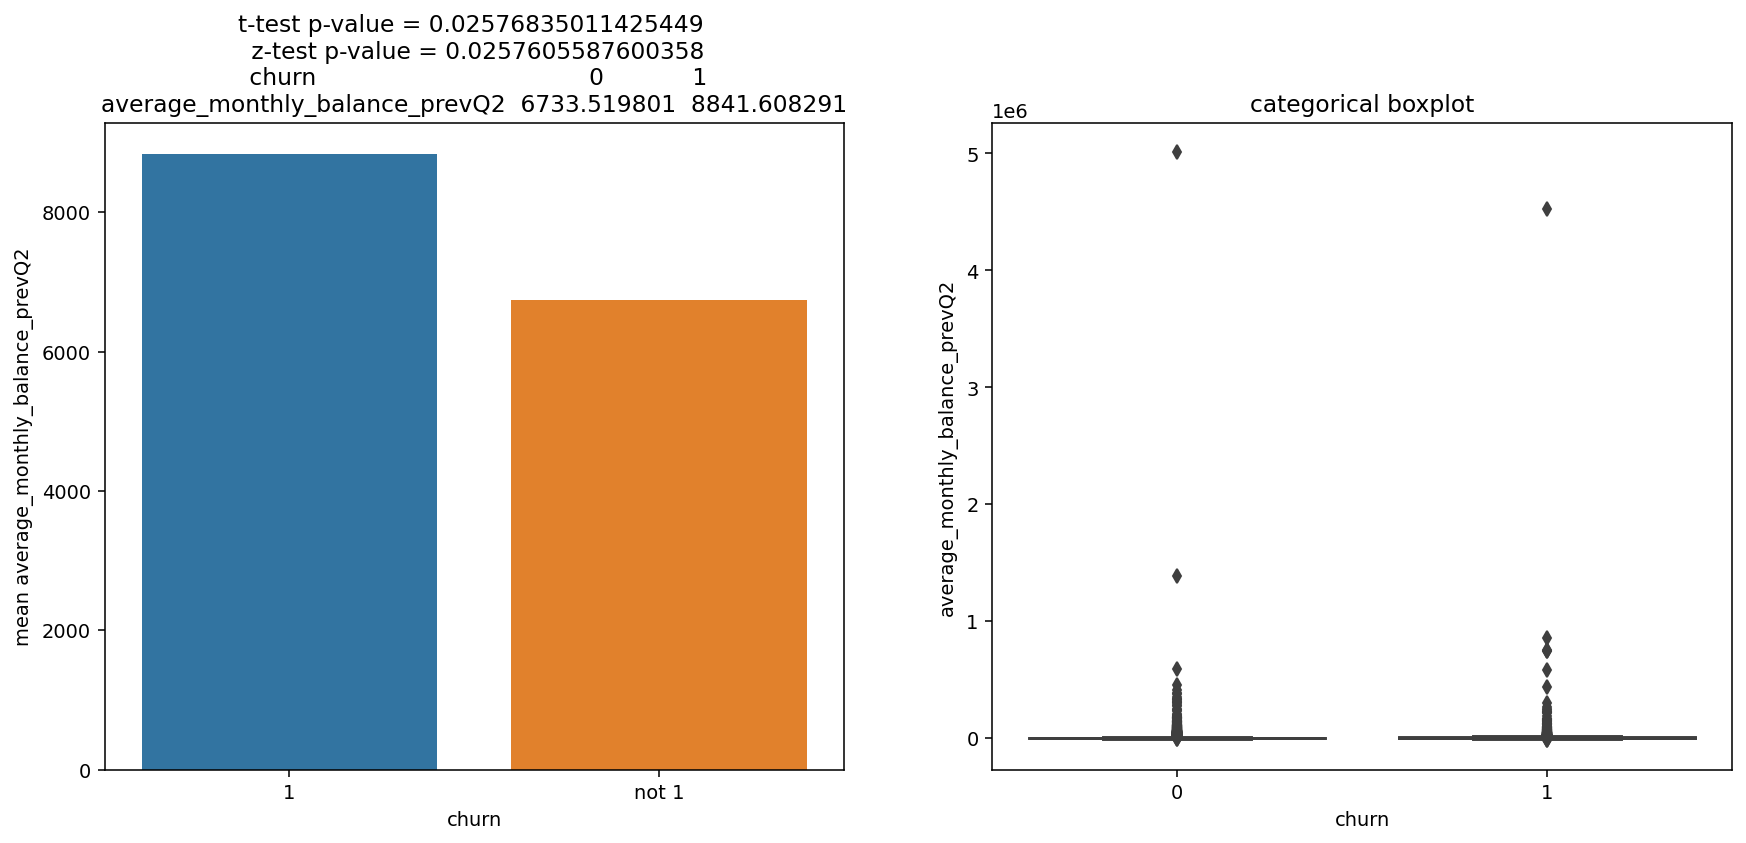

In [29]:
Bivariate_cont_cat(data, 'average_monthly_balance_prevQ2', 'churn', 1)

**Inferences**

We can see that people who churned actually had significantly higher balance during their previous two quarters.


#### previous month/current month

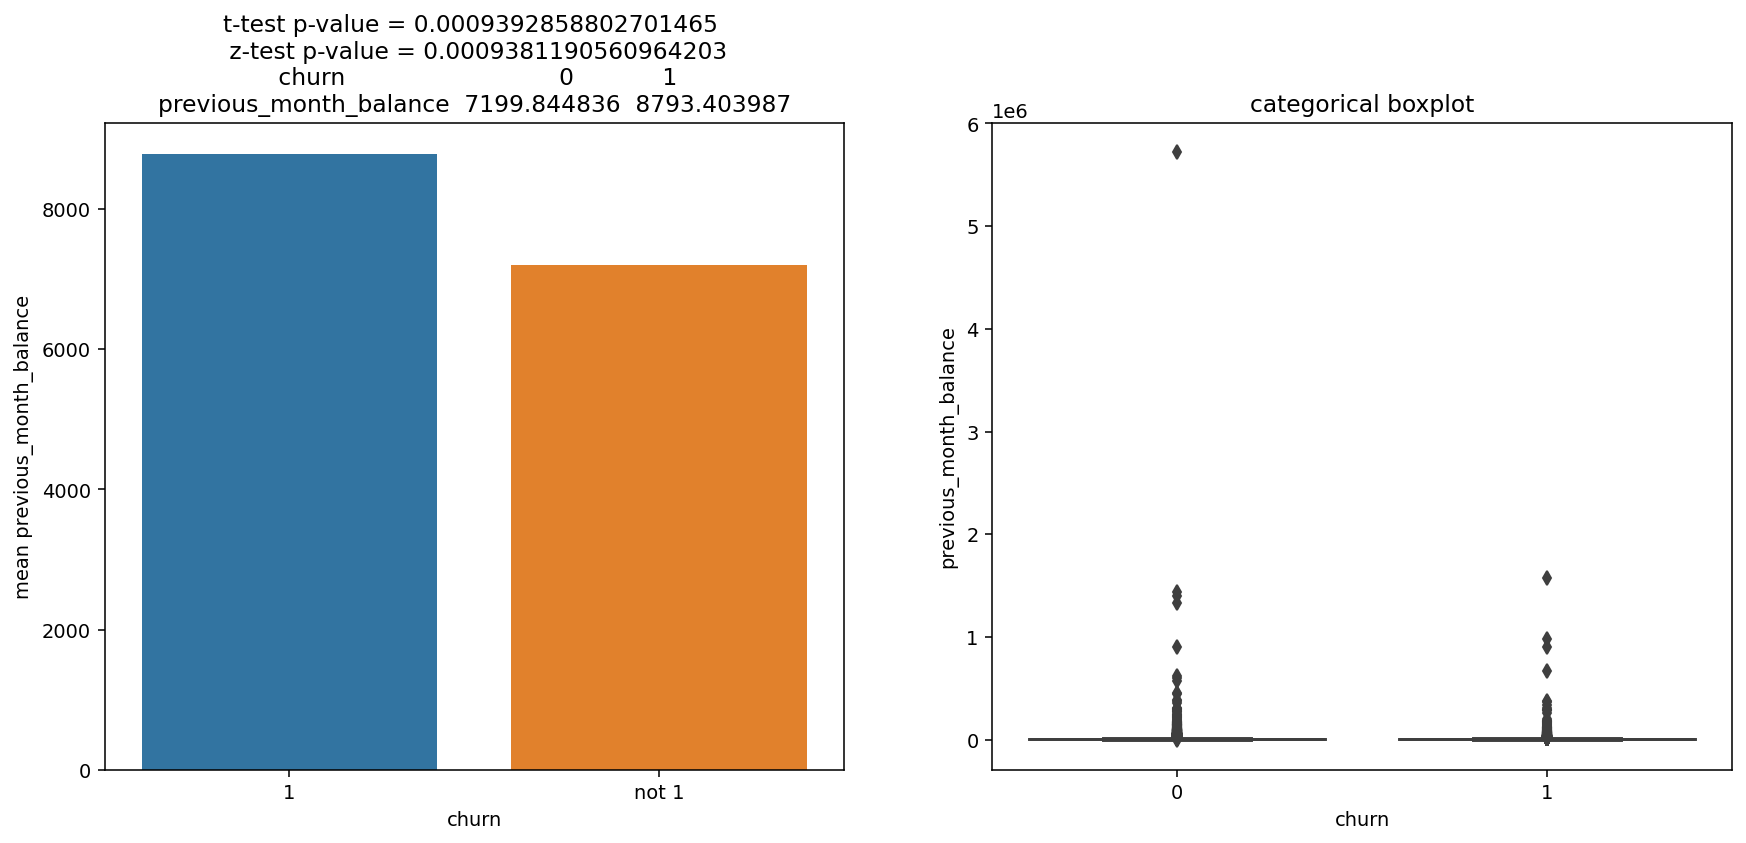

In [30]:
Bivariate_cont_cat(data, 'previous_month_balance', 'churn', 1)

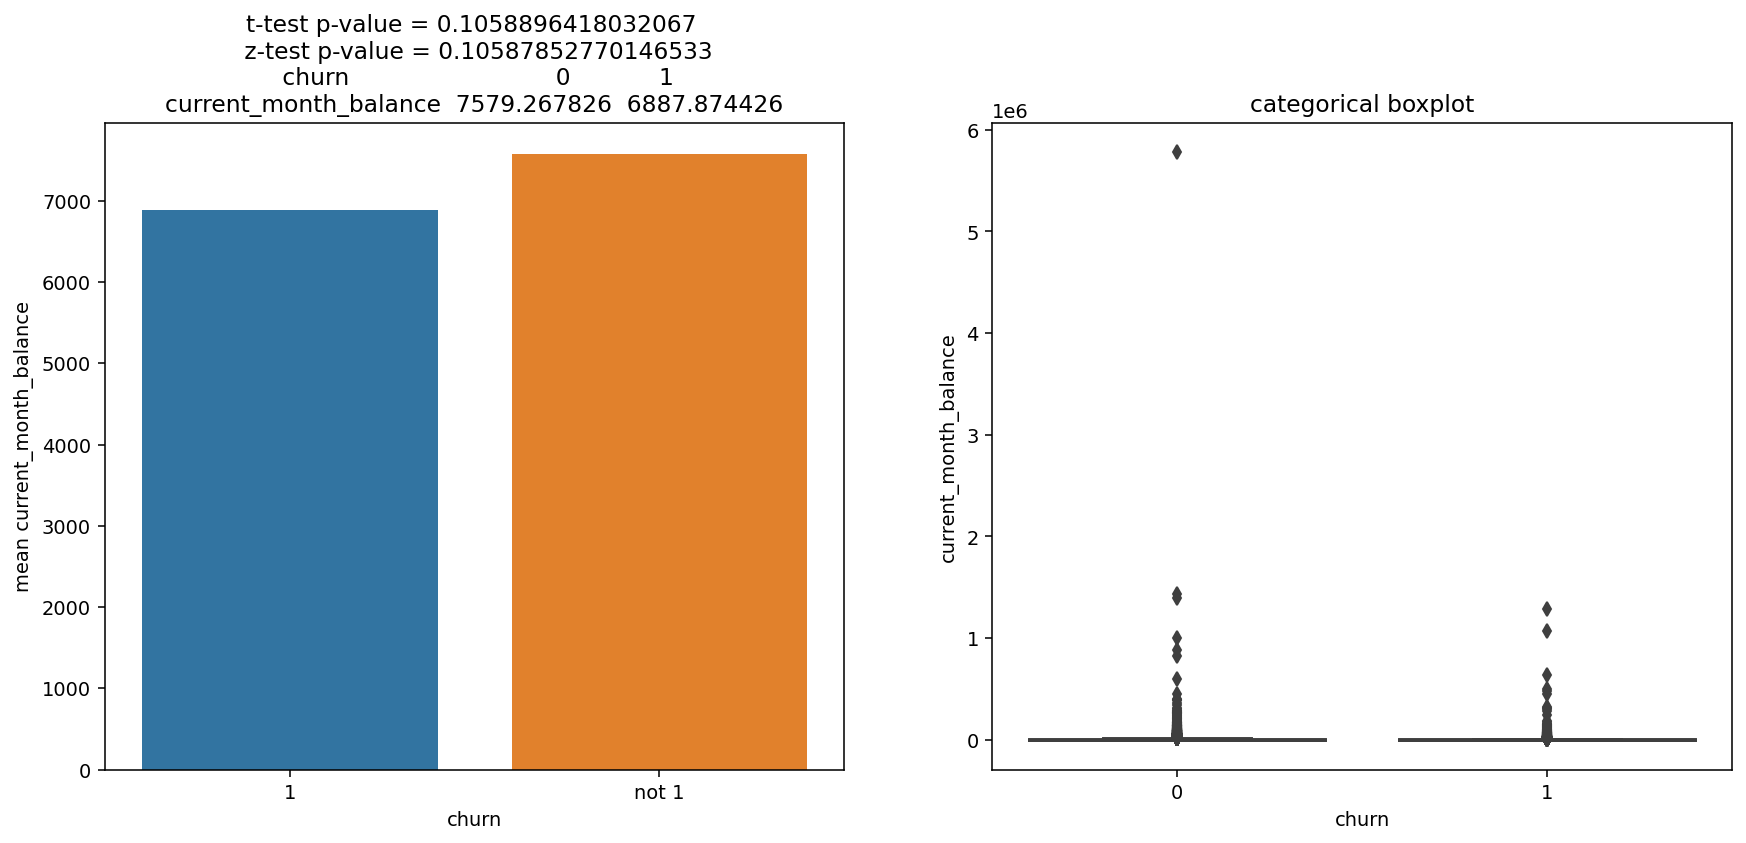

In [31]:
Bivariate_cont_cat(data, 'current_month_balance', 'churn', 1)

**Inferences**

Customers who churned had higher balance throughout the previous two quarters and previous month. But their average balance reduced in the current month. This signals recent trasactional activity with the bank. This could be a good sign as in, on average people are engaging with services and churn rate is likely to lower or remain constant.

### 3. Are customers dropping monthly balance highly likely to churn?

In [32]:
# Extracting drop of balance in previous and current month
difference = data[['churn','previous_month_balance','current_month_balance']][:]
difference['bal_diff'] = difference['current_month_balance']-difference['previous_month_balance']

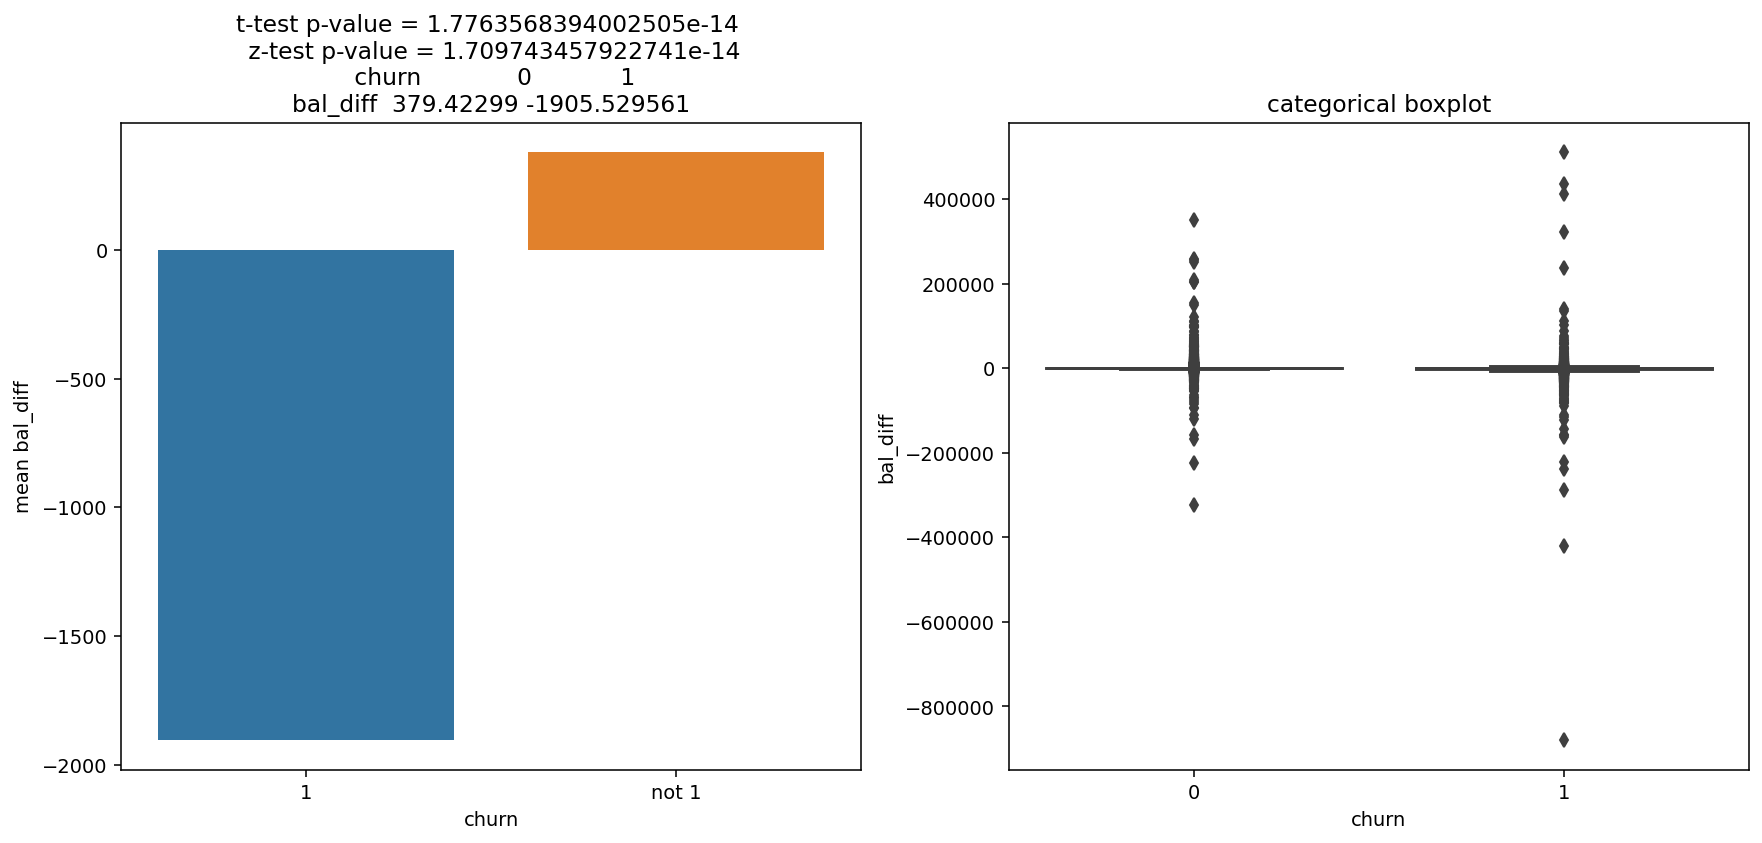

In [33]:
Bivariate_cont_cat(difference, 'bal_diff', 'churn', 1)

#### We see a stark contrast in those with +ve and -ve balance. We will see if those that have +ve balance current month are less likely to churn.

**Hypothesis**

* **Null:** churn rate of customers with more balance than prev month **>=** all customers


* **Alternate:** churn rate of customers with more balance than prev month **<** all customers (strictly greater)

> significance level = 0.05

In [34]:
# population proportion (churn rate of all customers)
p0 = round(data.churn.value_counts()[1]/data.churn.value_counts()[0],3)

# consider a sample of 200 values as test sample 
sample_data = data.loc[(data.current_balance - data.previous_month_balance) > 0].sample(n = 200, random_state = 0)

# count (number churned among test sample)
c = sample_data.loc[(sample_data.churn == 1)].shape[0]

# nobs (total number of higher vintage customers)
n = sample_data.shape[0]

print(p0, c, n)

0.227 23 200


In [35]:
print('p_value: ',proportions_ztest(c, n, p0, alternative='smaller')[1])

p_value:  3.436427263097148e-07


**Inference**

- Customers who churned had a very high drop in their balance which is signified by the negative value in this bar plot.


- The p value is very low, signalling strong evidence that customers who have more balance than previous month are very less likely to churn compared to population. This essentially means that their account was credited with money suggesting acitivity. This could be used in feature engineering as a significant predictor.